# 第2章 感知机

感知机是二分类的线性分类模型，旨在求出将训练数据进行线性划分的分离超平面，为此，导入入基于误分类的损失函数，利用梯度下降法对损失函数进行极小化，求得感知机模型。

于1957年被提出，是神经网络和支持向量机的基础。

叫感知机，大概是可以看成是人工神经元，输入多个信号，输出一个信号。

![感知机 维基百科](../images/感知机.png)

## 总结

1．感知机是根据输入实例的特征向量$x$对其进行二类分类的线性分类模型：

$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$

感知机模型对应于输入空间（特征空间）中的分离超平面$w \cdot x+b=0$。

2．感知机学习的策略是极小化损失函数：

$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$

损失函数对应于误分类点到分离超平面的总距离（没有考虑1/||w||(第二范数））。经验风险函数。损失函数是w，b的连续可导函数。如果选择误分类点点总数作为损失函数，这样不是参数的可导函数，不易优化。

3．感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。对偶形式的基本想法是，将w和b表示为实例$x_i$和标记$y_i$的线性组合的形式，通过求解其系数而求得w和b。
 
4．当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。


### 二分类模型
$f(x) = sign(w\cdot x + b)$

$\operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.$

给定训练集：

$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$

定义感知机的损失函数 

$L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$

---
#### 算法

随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$, $b$的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [3]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

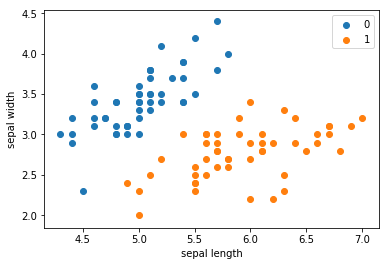

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [5]:
data = np.array(df.iloc[:100, [0, 1, -1]])

In [6]:
X, y = data[:,:-1], data[:,-1]

In [7]:
y = np.array([1 if i == 1 else -1 for i in y])

## Perceptron

In [8]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        # self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

In [9]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

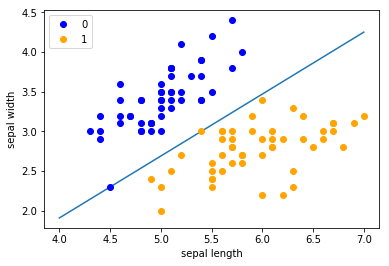

In [10]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### scikit-learn实例

In [11]:
import sklearn
from sklearn.linear_model import Perceptron

In [12]:
sklearn.__version__

'0.19.1'

In [13]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 shuffle=True)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [14]:
# Weights assigned to the features.
print(clf.coef_)

[[ 67.2 -85.6]]


In [15]:
# 截距 Constants in decision function.
print(clf.intercept_)

[-106.]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


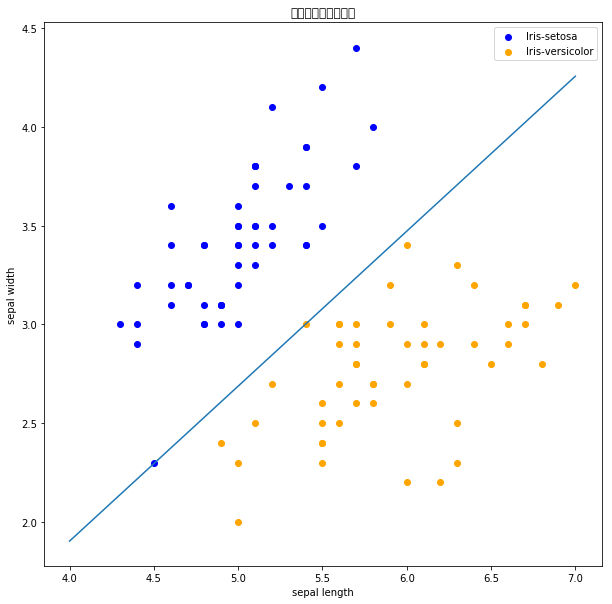

In [16]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

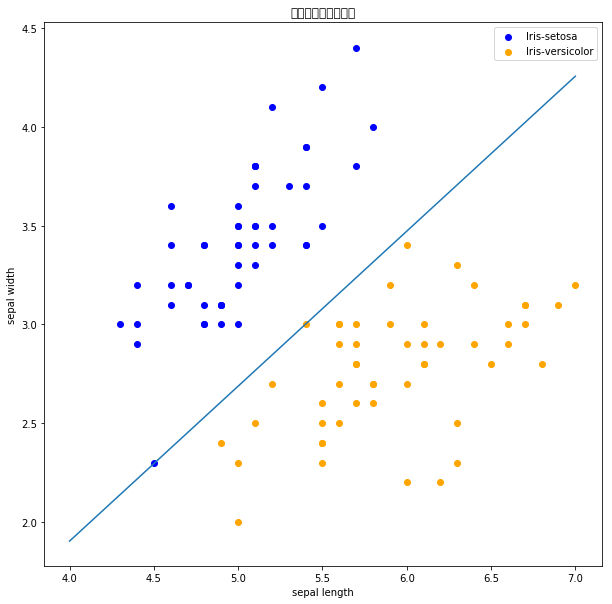

In [17]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

现在可以看到，所有的两种鸢尾花都被正确分类了。

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

中文注释制作：机器学习初学者

微信公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)

---

### 习题

2.1 验证感知机为什么不能表示异或。

![异或](../images/xor.png)

通过图像可以看出，找不到一个超平面能将这四个点分隔开，所以感知机无法处理异或问题，不仅仅是感知机，其他线性模型也无法处理这种问题[1][1]。

[1]: https://www.jianshu.com/p/81fa7682daf3
